In [1]:
import os, sys, time, resource, re, gc, shutil
from multiprocess import Pool
from functools import partial
from urllib.parse import urlparse, parse_qsl
import matplotlib
#from matplotlib.backends.backend_pdf import FigureCanvasPdf
#matplotlib.backend_bases.register_backend('pdf', FigureCanvasPdf)
#matplotlib.use('pgf')
#matplotlib.use('PS') 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import django
sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()
from django.db.models import Q, F, Sum, Count, FloatField, Case, When, Value, Max
import matplotlib.patches as patches
from scipy.sparse import csr_matrix, find

from scoping.models import *
from tmv_app.models import *

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from nltk.stem import SnowballStemmer


import textwrap as tw
from utils.text import *
import networkx as nx

stat = RunStats.objects.get(pk=662)

dtopics = DynamicTopic.objects.filter(run_id=stat)
wtopics = Topic.objects.filter(run_id=stat)

G = nx.Graph()

crange = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc']
node_colors = []
node_sizes = []

wt_max = wtopics.order_by('-score').first().score
dt_max = dtopics.order_by('-score').first().score

for dt in dtopics:
    G.add_node(dt,size=200)
    node_colors.append("grey")
    node_sizes.append(200/dt_max*dt.score)
    
for wt in wtopics:
    G.add_node(wt,size=50)
    for tdt in wt.topicdtopic_set.filter(dynamictopic__run_id=stat):
        G.add_edge(wt,tdt.dynamictopic,weight=tdt.score*0.01)
    node_colors.append(crange[wt.period.n-1])
    node_sizes.append(100/wt_max*wt.score)
    



In [2]:
#nx.draw(
#    G,
#    node_color=node_colors,
#    node_size=node_sizes,
#    pos=nx.kamada_kawai_layout(G),
#    width=0.05
#)

nx.draw(
    G,
    node_color=node_colors,
    node_size=node_sizes,
    pos=nx.spring_layout(G,k=0.05),
    width=0.005
)

{data, method, estim}
{research, sustain, develop}
{sea, level, rise}
{research, sustain, develop}
{process, captur, gas}
{research, sustain, develop}
{fuel, gas, fossil}
{research, sustain, develop}
{risk, vulner, disast}
{research, sustain, develop}
{sediment, deposit, eros}
{research, sustain, develop}
{speci, distribut, rang}
{research, sustain, develop}
{data, satellit, set}
{research, sustain, develop}
{record, dure, period}
{research, sustain, develop}
{optim, design, oper}
{research, sustain, develop}
{scenario, futur, rcp}
{research, sustain, develop}
{model, predict, use}
{research, sustain, develop}
{polici, tax, econom}
{research, sustain, develop}
{manag, plan, resourc}
{research, sustain, develop}
{adapt, vulner, capac}
{research, sustain, develop}
{govern, social, polit}
{research, sustain, develop}
{power, nuclear, generat}
{research, sustain, develop}
{environment, impact, life}
{research, sustain, develop}
{veget, pollen, type}
{research, sustain, develop}
{habitat, c

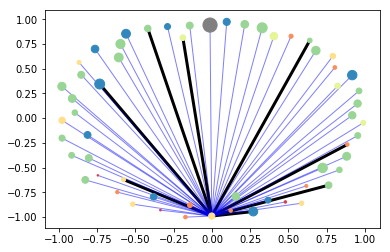

In [3]:
G = nx.Graph()

crange = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc']
crange = ["#D53E4F", '#FC8D59', '#FEE08B', '#E6F598','#99D594','#3288BD']

node_colors = []
node_sizes = []

wt_max = wtopics.order_by('-score').first().score
dt_max = dtopics.order_by('-score').first().score

for dt in dtopics.filter(pk=10743):
    G.add_node(dt,size=200)
    node_colors.append("grey")
    node_sizes.append(200/dt_max*dt.score)
    
for wt in wtopics.filter(topicdtopic__dynamictopic__pk=10743).distinct():
    G.add_node(wt,size=50)
    for tdt in wt.topicdtopic_set.filter(dynamictopic__pk=10743):
        G.add_edge(wt,tdt.dynamictopic,weight=tdt.score*10)
        print(wt)
        print(tdt.dynamictopic)
    node_colors.append(crange[wt.period.n-1])
    node_sizes.append(100/wt_max*wt.score)
    
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 1]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 1]

pos=nx.spring_layout(G,k=50)

nx.draw_networkx_nodes(
    G,
    pos=pos,
    node_size=node_sizes,
    node_color=node_colors
)

nx.draw_networkx_edges(G, pos, edgelist=elarge,
                       width=3)

nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=1, alpha=0.5, edge_color='b',)


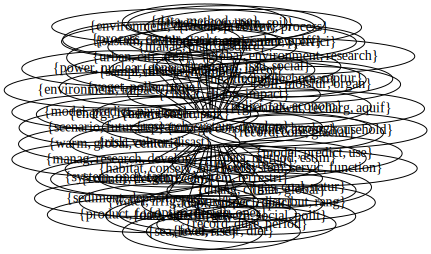

In [4]:
from graphviz import Graph

g = Graph("bla",engine="neato")

for dt in dtopics.filter(pk=10743):
    g.node(dt.title)
    #node_colors.append("grey")
    #node_sizes.append(200/dt_max*dt.score)
    
for wt in wtopics.filter(topicdtopic__dynamictopic__pk=10743).distinct():
    g.node(wt.title)
    for tdt in wt.topicdtopic_set.filter(dynamictopic__pk=10743):
        g.edge(wt.title,tdt.dynamictopic.title)#,weight=tdt.score*0.01)

    

g

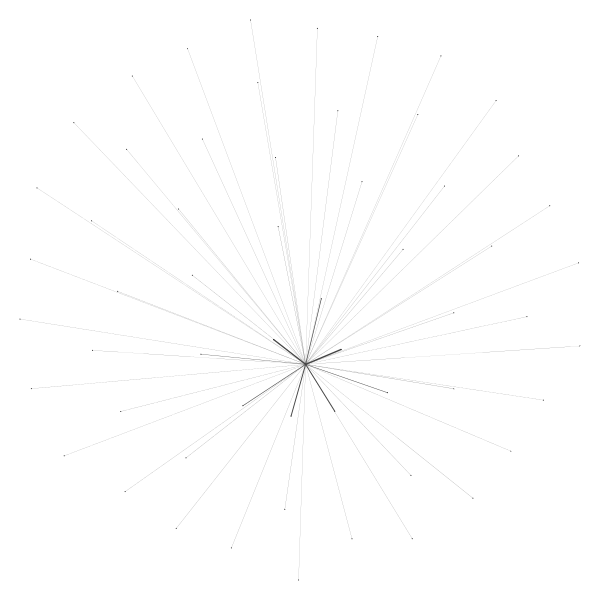

In [5]:
import igraph

dtvs = dtopics.filter(pk=10743)
wtvs = wtopics.filter(topicdtopic__dynamictopic__pk=10743).distinct()

wt_max = wtvs.order_by('-share').first().score
dt_max = dtvs.order_by('-share').first().score

crange = ["#D53E4F", '#FC8D59', '#FEE08B', '#E6F598','#99D594','#3288BD']

node_colors = []

nodes = []

g = igraph.Graph()

#g.add_vertices(dtvs.count()+wtvs.count())

for dt in dtvs:
    g.add_vertex(
        name=str(dt.id),
        color="#808080",
        size=20/dt_max*dt.share,
        title=dt.title,
        ttype="dynamic"
    )
    #node_colors.append("grey")
    
for wt in wtvs:
    node_colors.append(crange[wt.period.n-1])
    g.add_vertex(
        name=str(wt.id),
        color=crange[wt.period.n-1],
        size=10/wt_max*wt.share,
        title=wt.title,
        ttype="window"
    )
    j = len(nodes)-1
    for tdt in wt.topicdtopic_set.filter(dynamictopic__pk=10743):
        dt = tdt.dynamictopic
        g.add_edge(str(dt.id),str(wt.id),weight=tdt.score)


layout = g.layout('fr', weights='weight')

#g.vs["color"] = node_colors

igraph.plot(
    g, 
    layout=layout, 
    edge_width=[0.1+np.log(x+1) for x in g.es['weight']], 
)

In [51]:
igraph.summary(g)




IGRAPH UNW- 548 4524 -- 
+ attr: color (v), connection_to_n (v), label (v), label_size (v), name (v), size (v), title (v), ttype (v), connection_to_n (e), weight (e)


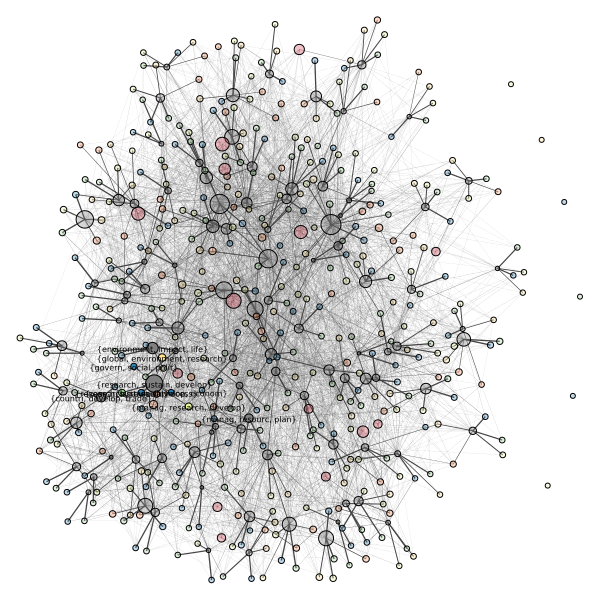

In [8]:
import igraph

dtvs = dtopics#.filter(pk=10743)
wtvs = wtopics#.filter(topicdtopic__dynamictopic__pk=10743).distinct()

wtvs = wtvs.filter(period__n__lt=7)

wt_max = wtvs.order_by('-share').first().share
dt_max = dtvs.order_by('-share').first().share

crange = ["#D53E4F", '#FC8D59', '#FEE08B', '#E6F598','#99D594','#3288BD']

node_colors = []

nodes = []

g = igraph.Graph()

#g.add_vertices(dtvs.count()+wtvs.count())

for dt in dtvs:
    if dt.share > 0.0001:
        title=dt.title
    else:
        title=None
    g.add_vertex(
        name=str(dt.id),
        color="#808080",
        size=20/dt_max*dt.share,
        title=title,
        ttype="dynamic"
    )
    #node_colors.append("grey")
    
for wt in wtvs:
    node_colors.append(crange[wt.period.n-1])
    g.add_vertex(
        name=str(wt.id),
        color=crange[wt.period.n-1],
        size=5+10/wt_max*wt.share,
        title=wt.title,
        ttype="window"
    )
    j = len(nodes)-1
    for tdt in wt.topicdtopic_set.filter(dynamictopic__run_id=stat):
        dt = tdt.dynamictopic
        g.add_edge(str(dt.id),str(wt.id),weight=tdt.score)

for v in g.vs:
    v['connection_to_n'] = 0
    #if v['ttype']=="dynamic":

for e in g.es:
    e['connection_to_n'] = 0   
    e['highlight'] = False

    
n = g.vs.find(name='10743')
n['label'] = n['title']

dt_graph = igraph.Graph()
dt_graph.add_vertex(name=str(n['name']))

s = dt_graph.vs.find(name=str(n['name']))

for e in g.incident(n):
    edge = g.es[e]
    edge['connection_to_n'] = edge['weight']
    target = g.vs[edge.target] 
    target['connection_to_n'] = edge['weight']
    for de in g.incident(target):
        dedge = g.es[de]
        dtarget = g.vs[dedge.source]
        if dtarget['name'] == s['name']:
            continue            
        if dtarget['ttype'] == "dynamic":
            try:
                dt = dt_graph.vs.find(name=str(dtarget['name']))
                dte = dt_graph.es.find(_source=s.index,_target=dt.index)
                dte['weight'] += edge['weight'] * dedge['weight']
            except:
                dt_graph.add_vertex(name=str(dtarget['name']))
                dte = dt_graph.add_edge(
                    source=str(n['name']),
                    target=str(dtarget['name']),
                    weight=edge['weight'] * dedge['weight']
                )
                if edge['weight'] * dedge['weight']==0:
                    print(edge['weight'])
                    print(dedge['weight'])
        
for i,v in enumerate(dt_graph.get_adjacency('weight')[0]):
    if i ==0:
        source=dt_graph.vs[i]
    else:
        target=dt_graph.vs[i]
        target=g.vs.find(name=target['name'])
        target['connection_to_n'] = v     
        
        
layout = g.layout('fr', weights='weight')
label_ids = []
labels = []
for v in g.vs:
    if v['connection_to_n'] > 0.5 or v==n:
        v['label'] = v['title']    
        v['label_size'] = 8
        label_ids.append(v)
        labels.append(v['title'])
    else:
        v['label'] = None
        v['color'] = v['color'][0:7] + "4D"

#g.vs["color"] = node_colors

igraph.plot(
    g, 
    layout=layout, 
    edge_width=[0.05+np.log(x+1) for x in g.es['weight']], 
)

In [9]:
x = igraph.plot(
    g, 
    layout=layout, 
    edge_width=[0.05+np.log(x+1) for x in g.es['weight']], 
)


In [11]:
g.es[0]

igraph.Edge(<igraph.Graph object at 0x7f6b4308d7c8>, 0, {'weight': 0.0050175480768486, 'connection_to_n': 0})

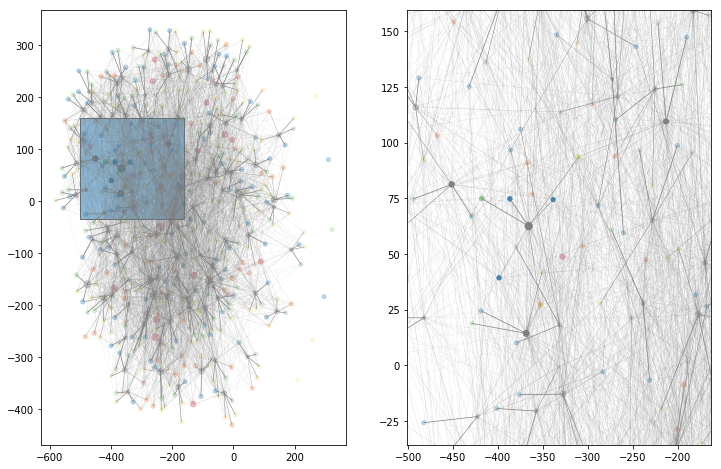

In [56]:
from adjustText import adjust_text

x = [x[0] for x in layout]
y = [x[1] for x in layout]
c = [v["color"] for v in g.vs]
s = [v["size"]*3 for v in g.vs]

plt.rcParams["figure.figsize"] = (12,8)



fig, axs = plt.subplots(1,2)

ax = axs[0]

def draw_graph(x,y,c,s,ax):

    ax.scatter(x,y,c=c,s=s)

    for e in g.es:#[:1000]:
        s = layout[e.source]
        t = layout[e.target]
        ex = [s[0],t[0]]
        ey = [s[1],t[1]]
        lw = 0.05+(np.log(e['weight']+1)*0.5) +0.05+(np.log(e['connection_to_n']+1)*5)  #+0.05+np.log(e['connection_to_n'])
        ax.plot(
            ex,
            ey,
            c="grey",
            lw=0.05+(np.log(e['weight']+1)*0.5)    
        )
    texts = []    
    xs = []
    ys = []
    for l in label_ids:
        xy = layout[l.index]
        xs.append(xy[0])
        ys.append(xy[1])
        #texts.append(ax.text(xy[0],xy[1],l['title']))
        #adjust_text(texts, force_points=0.2, force_text=0.2, expand_points=(1,1), expand_text=(1,1),
                #arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
            
    return xs, ys

xs, ys = draw_graph(x,y,c,s,ax)
p = 50
bw = max(xs)-min(xs)
bh = max(ys)-min(ys)
ax.add_patch(patches.Rectangle(
        (min(xs)-p,min(ys)-p),
        width=bw+p*2,
        height=bh+p*2,
        fill=True,
        #figure=fig,
        alpha=0.5,
        edgecolor='black'
    ))

ax = axs[1]
ax.set_xlim(min(xs)-p,max(xs)+p)
ax.set_ylim(min(ys)-p,max(ys)+p)
draw_graph(x,y,c,s,ax)

plt.show()

In [26]:
width = max(xs) - min()


-212.7347873627404

In [14]:
m.shape

NameError: name 'm' is not defined

In [ ]:
igraph.summary(g)

In [ ]:
wtopics.filter(period__n__lt=11)